# Skaters (Season 2024/25) - Icetime

### Import libraries

In [1]:
import sys
import os
import pandas as pd

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
from utils import data_cleaning
from utils import distribution_analysis as da

### Import the dataset

In [4]:
#skaters_df = "https://moneypuck.com/moneypuck/playerData/seasonSummary/2024/regular/skaters.csv"
skaters_df = "../data/skaters.csv"
df = pd.read_csv(skaters_df)
df.head(5)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


### Read the data

In [5]:
data_cleaning.print_df_size(df)

Number of samples: 4600
Number of features: 154


In [6]:
data_cleaning.save_column_names(df)

Saved: names_columns.txt


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


### Data cleaning

In [8]:
# Missing values?
data_cleaning.report_nan(df)

No missing values found.


In [9]:
df = data_cleaning.drop_duplicate_columns(df, ["faceoffsWon", "I_F_faceOffsWon"])
df = data_cleaning.drop_duplicate_columns(df, [ "penalityMinutes", "I_F_penalityMinutes"])

Dropped columns: ['I_F_faceOffsWon']
Number of features: 153
Dropped columns: ['I_F_penalityMinutes']
Number of features: 152


### Variables and Filter

In [10]:
situation = "all"
feature = "icetime"
feature_mins = "icetime_mins"
feature_hours = "icetime_hours"
min_games_played = 20
name_player="Auston Matthews"

In [11]:
df_icetime = df.copy()
df_icetime[feature_mins] = df_icetime[feature] / 60
df_icetime[feature_hours] = df_icetime[feature] // 3600
df_icetime = df_icetime[(df_icetime["situation"] == situation) & (df_icetime["games_played"] >= min_games_played)]

### Summary Statistics

In [12]:
answer = df_icetime.loc[lambda d: d[feature_mins].idxmax()]
print(f"Player with most icetime minutes: {answer["name"]} with {answer[feature_mins]:.2f} minutes.")

Player with most icetime minutes: Zach Werenski with 2166.37 minutes.


### Frequency Tables

To improve readability and avoid excessive granularity, icetime is converted now from seconds to whole hours. 

This reduces noise in the frequency table and highlights broader patterns in playing time among skaters who played at least 20 games.

Mean: 17.686
Variance: 54.279
Standard deviation: 7.362
Mode: 19.0


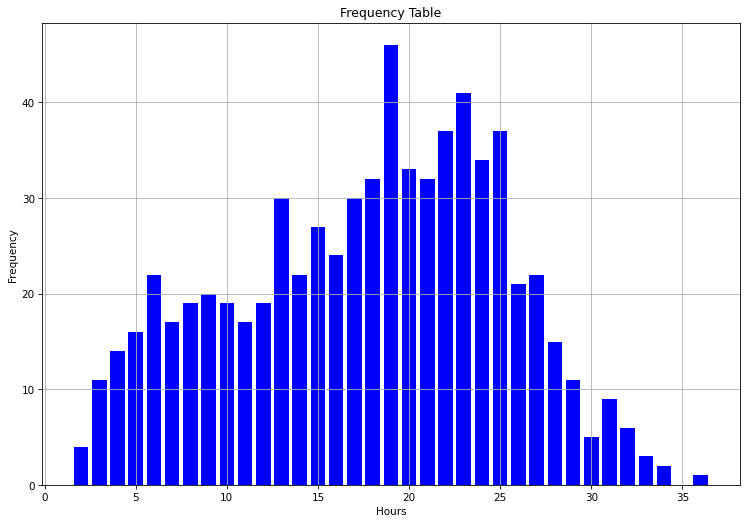

In [13]:
da.plot_ftab(df_icetime, feature_hours, xlabel="Hours")

Cohen's effect size: -0.50


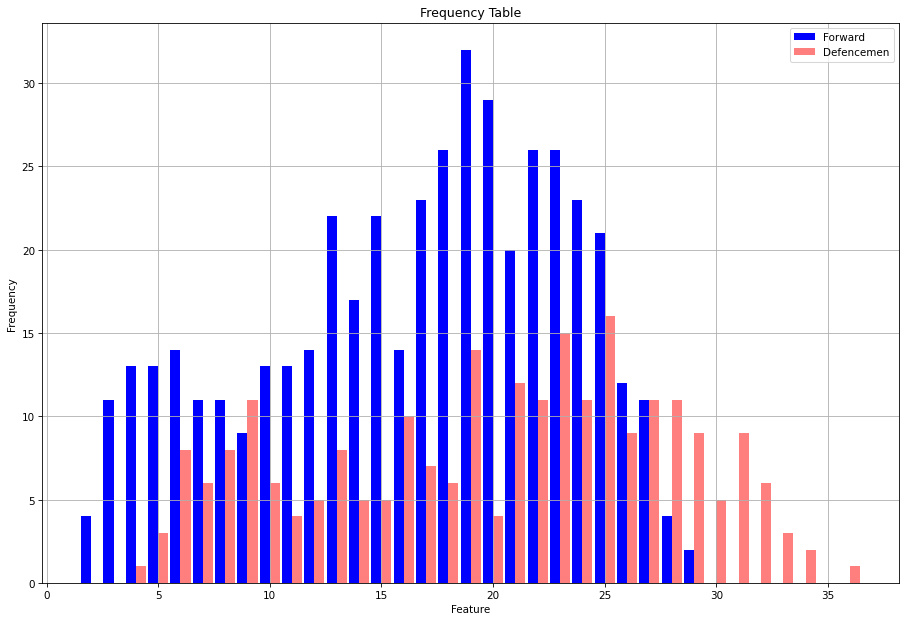

In [14]:
df1 = df_icetime[df_icetime["position"]!="D"]
df2 = df_icetime[df_icetime["position"]=="D"]

da.plot_two_ftabs(df1, df2, feature_hours, name1="Forward", name2="Defencemen")

### Probability Mass Function

Actual PMF: 
Mean: 17.686
Variance: 54.20
Standard deviation: 7.362
Mode: 19.0
Skewness: -0.206

Observed PMF: 
Mean: 20.751
Variance: 40.17
Standard deviation: 6.338
Mode: 23.0
Skewness: -0.420


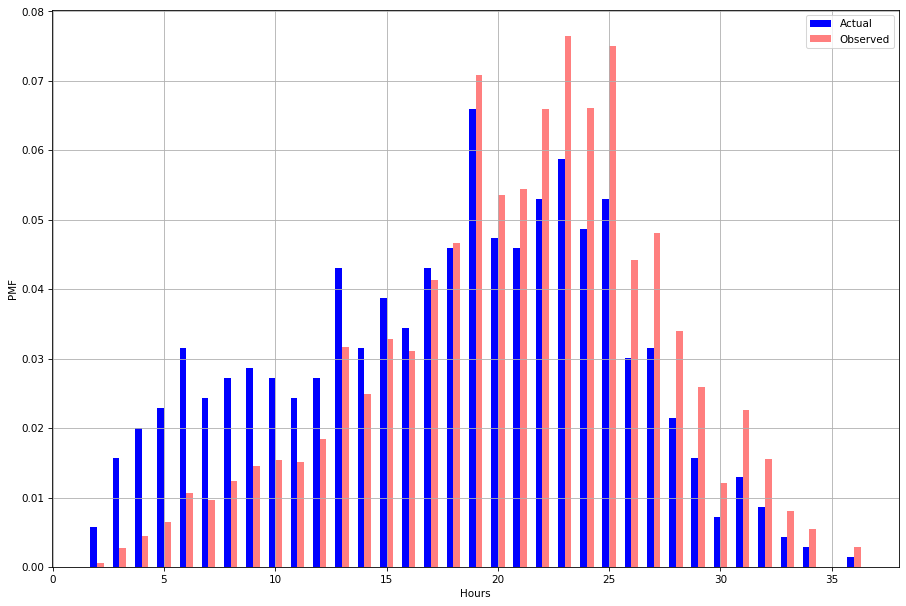

In [15]:
da.plot_pmf(df_icetime, feature_hours, xlabel="Hours", width=0.3)

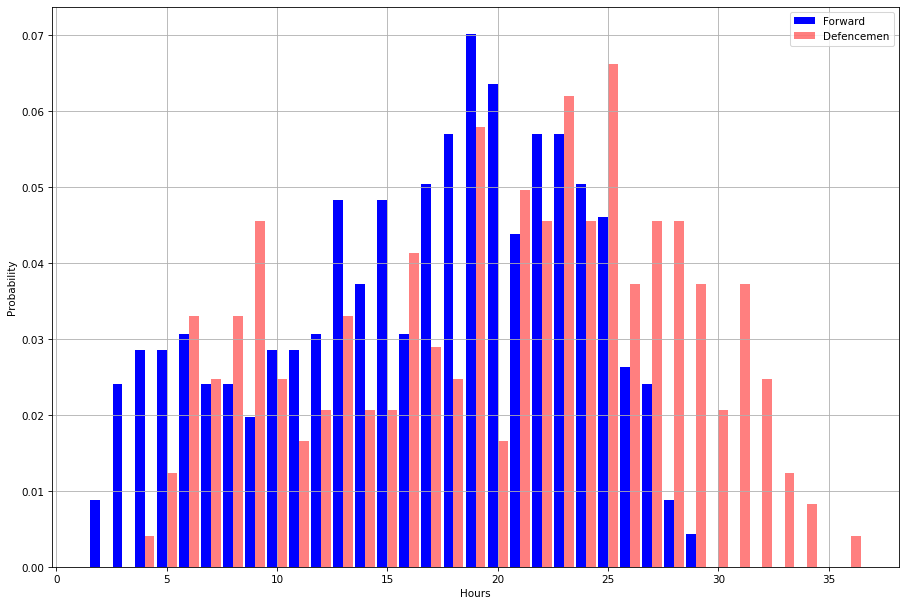

In [16]:
df1 = df_icetime[df_icetime["position"]!="D"]
df2 = df_icetime[df_icetime["position"]=="D"]

da.plot_two_pmfs(df1, df2, feature_hours, name1="Forward", name2="Defencemen", xlabel="Hours")

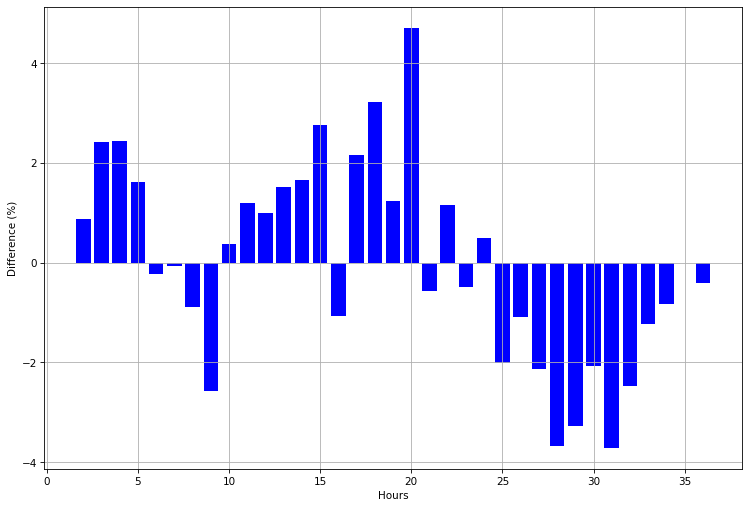

In [17]:
df1 = df_icetime[df_icetime["position"]!="D"]
df2 = df_icetime[df_icetime["position"]=="D"]

da.plot_diff_pmfs(df1, df2, feature_hours, name1="Forward", name2="Defencemen", xlabel="Hours")

### Cumulative Distribution Function

Auston Matthews - Percentile rank: 69.63
Median: 69042.00
Interquartile range: 39292.00
Quartile skewness: -0.16


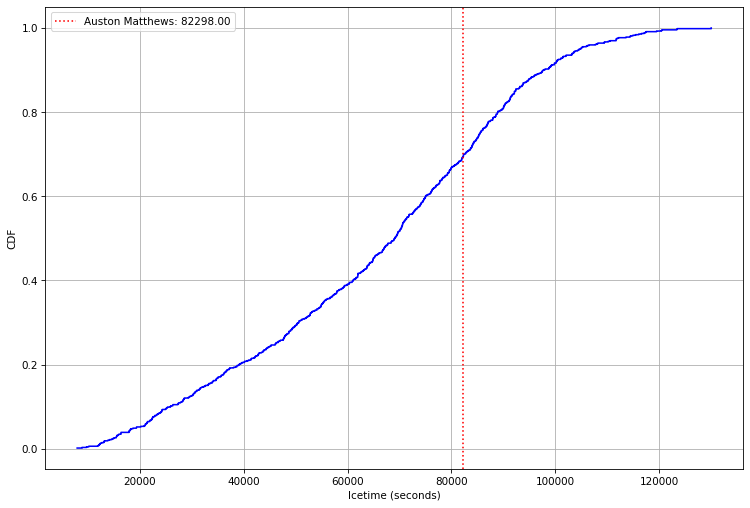

In [18]:
vals = df_icetime[feature].values
ref = df_icetime[df_icetime["name"]==name_player][feature].values[0]

da.print_percentile_rank(ref, vals, label=name_player)
da.plot_cdf(ref, vals, label=name_player, xlabel="Icetime (seconds)")

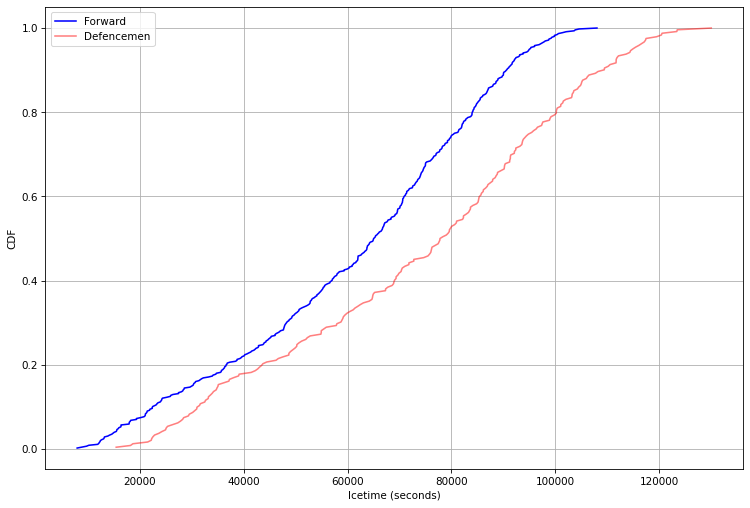

In [19]:
vals1 = df_icetime[df_icetime["position"]!="D"][feature].values
vals2 = df_icetime[df_icetime["position"]=="D"][feature].values

da.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Icetime (seconds)")

### Probability Density Function and Kernel Density Estimate

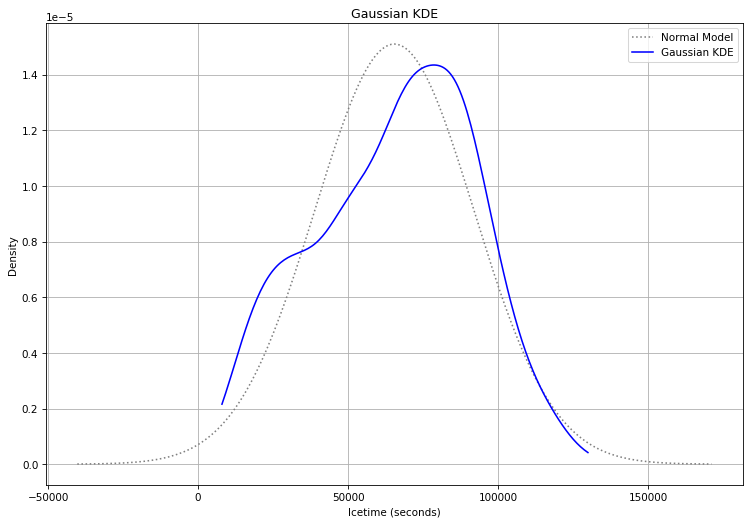

In [27]:
da.plot_gaussian_kde(df_icetime[feature], xlabel="Icetime (seconds)")

### Modeling Distribution

In [36]:
from utils import distribution_analysis as da
import importlib
importlib.reload(da)

<module 'utils.distribution_analysis' from '/Users/daniel_daduyo/Desktop/projects/moneypuck-data/utils/distribution_analysis.py'>

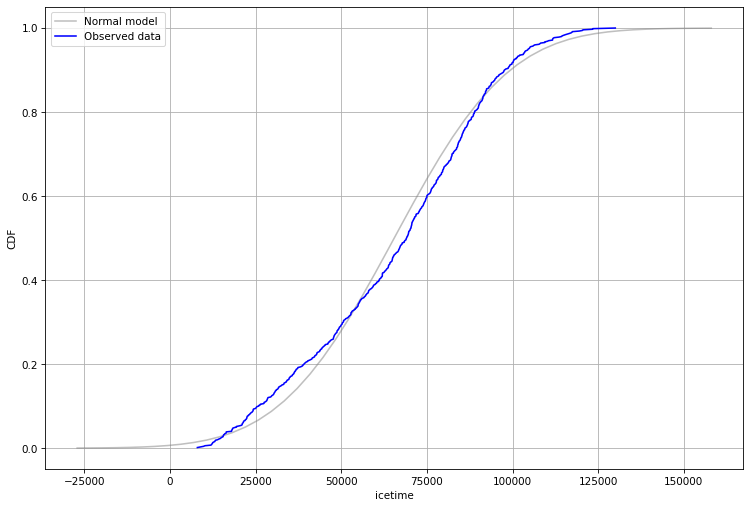

In [32]:
da.plot_cdf_with_normal(df_icetime[feature])

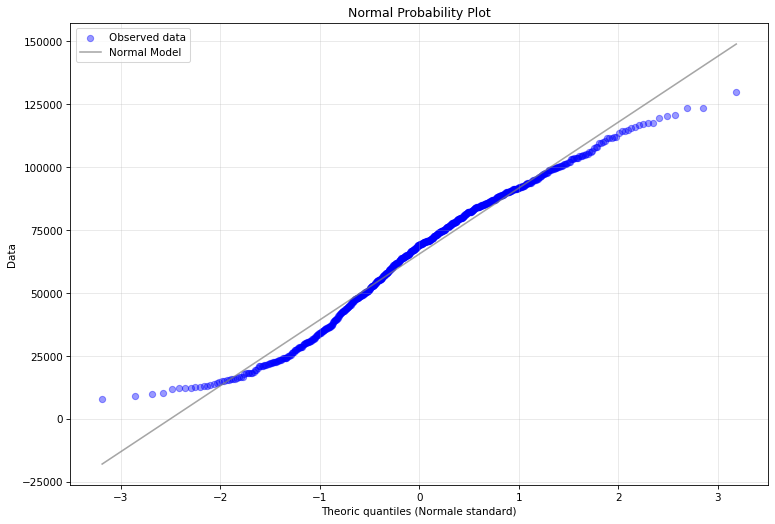

(array([-3.18798801e+00, -2.85542005e+00, -2.68915459e+00, -2.57483977e+00,
        -2.48668412e+00, -2.41444245e+00, -2.35295991e+00, -2.29926367e+00,
        -2.25147765e+00, -2.20833929e+00, -2.16895685e+00, -2.13267630e+00,
        -2.09900320e+00, -2.06755435e+00, -2.03802655e+00, -2.01017559e+00,
        -1.98380182e+00, -1.95873980e+00, -1.93485089e+00, -1.91201769e+00,
        -1.89013988e+00, -1.86913105e+00, -1.84891620e+00, -1.82942982e+00,
        -1.81061433e+00, -1.79241882e+00, -1.77479809e+00, -1.75771178e+00,
        -1.74112374e+00, -1.72500140e+00, -1.70931536e+00, -1.69403896e+00,
        -1.67914797e+00, -1.66462027e+00, -1.65043563e+00, -1.63657550e+00,
        -1.62302282e+00, -1.60976185e+00, -1.59677807e+00, -1.58405802e+00,
        -1.57158923e+00, -1.55936010e+00, -1.54735982e+00, -1.53557832e+00,
        -1.52400620e+00, -1.51263463e+00, -1.50145537e+00, -1.49046066e+00,
        -1.47964324e+00, -1.46899623e+00, -1.45851320e+00, -1.44818804e+00,
        -1.4

In [37]:
da.normal_probability_plot(df_icetime[feature])